# Testing the dense NN for classification using the MNIST image data

## Author: Bojian Xu, bojianxu@ewu.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nn
import sys
sys.path.append('..')
from code_misc.utils import MyUtils

In [2]:
k = 10  #number of classes
d = 784 #number of features, excluding the bias feature

In [3]:
# READ in data
df_X_train = pd.read_csv('MNIST/x_train.csv', header=None)
df_y_train = pd.read_csv('MNIST/y_train.csv', header=None)
df_X_test = pd.read_csv('MNIST/x_test.csv', header=None)
df_y_test = pd.read_csv('MNIST/y_test.csv', header=None)

# save in numpy arrays
X_train_raw = df_X_train.to_numpy()
y_train_raw = df_y_train.to_numpy()
X_test_raw = df_X_test.to_numpy()
y_test_raw = df_y_test.to_numpy()

# get training set size
n_train = X_train_raw.shape[0]
n_test = X_test_raw.shape[0]

# normalize all features to [0,1]
X_all = MyUtils.normalize_0_1(np.concatenate((X_train_raw, X_test_raw), axis=0))
X_train = X_all[:n_train]
X_test = X_all[n_train:]

# convert each label into a 0-1 vector
y_train = np.zeros((n_train, k))
y_test = np.zeros((n_test, k))
for i in range(n_train):
    y_train[i,int(y_train_raw[i])] = 1.0
for i in range(n_test):
    y_test[i,int(y_test_raw[i])] = 1.0


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [4]:
#print(y_train[-10:])

In [5]:
# build the network
nuts = nn.NeuralNetwork()

nuts.add_layer(d = d)  # input layer - 0

nuts.add_layer(d = 50, act = 'logis')  # hidden layer - 1
nuts.add_layer(d = 50, act = 'logis')  # hidden layer - 1
nuts.add_layer(d = 50, act = 'logis')  # hidden layer - 1
nuts.add_layer(d = 20, act = 'logis')  # hiddent layer - 2
nuts.add_layer(d = 20, act = 'logis')  # hiddent layer - 2
#nuts.add_layer(d = 100, act = 'relu')  # hiddent layer - 3
#nuts.add_layer(d = 30, act = 'relu')  # hiddent layer - 4

nuts.add_layer(d = k, act = 'logis')  # output layer,    multi-class classification, #classes = k

In [6]:
errors = nuts.fit(X_train, y_train, eta = 0.2, iterations = 5, SGD = False, mini_batch_size = 20)

iteration:  0
Time for feed-forward:  0.4706132411956787
error:  3.156528403437616
Time for back-propagation:  1.102130651473999
Time for update weights:  0.0009629726409912109
iteration:  1
Time for feed-forward:  0.5122778415679932
error:  2.51812208541036
Time for back-propagation:  1.0933780670166016
Time for update weights:  0.0
iteration:  2
Time for feed-forward:  0.4837038516998291
error:  2.04553819035937
Time for back-propagation:  1.155538558959961
Time for update weights:  0.0
iteration:  3
Time for feed-forward:  0.49717164039611816
error:  1.7161959848531236
Time for back-propagation:  1.089301586151123
Time for update weights:  0.0010266304016113281
iteration:  4
Time for feed-forward:  0.49587535858154297
error:  1.4927615962594234
Time for back-propagation:  1.0946362018585205
Time for update weights:  0.0
Time for fit-batch:  8.020027160644531


c:\users\trose8\pycharmprojects\prog6\venv\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


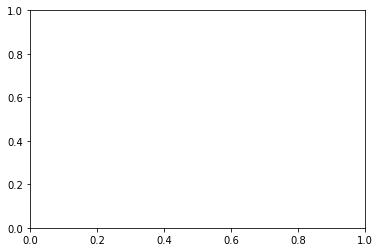

In [ ]:
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()

In [7]:
# x = np.arange(len(errors2))
# plt.plot(x, errors2)
# plt.show()

ERROR! Session/line number was not unique in

In [8]:
print(nuts.error(X_train, y_train))
print(nuts.error(X_test, y_test))

 database. History logging moved to new session 8
Time for feed-forward:  0.5128738880157471
0.8876333333333334
Time for feed-forward:  0.09371471405029297
0.8865


In [9]:
preds = nuts.predict(X_test)

Time for feed-forward:  0.06992006301879883


In [10]:
#print(preds[:100])
#print(y_test_raw[:100])
#print(np.sum(preds != y_test_raw))

In [11]:
# for i in range(y_test.shape[0]):
#     if preds[i] != y_test_raw[i]:
#         print('misclassified!!')
#     print('predicted as', preds[i])
#     print('label is', y_test_raw[i])
#     pixels = X_test_raw[i].reshape((28, 28))
#     plt.imshow(pixels, cmap='gray')
#    plt.show()


In [12]:

misclassified = 0
classified = 0

for i in range(y_test.shape[0]):
    if preds[i] != y_test_raw[i]:
        misclassified += 1
    else:
        classified += 1
print(misclassified)
print(classified)

8865
1135
